In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA630/refs/heads/master/data/housing_data.csv')
df.head()

,Bedrooms,Area,City_Distance,Age,Price
0,1,26.184098,1286.68,67,96004.804557
1,1,34.866901,1855.25,30,92473.722570
2,1,36.980709,692.09,24,98112.519940
3,1,17.445723,1399.49,66,92118.326874
4,1,52.587646,84.65,3,98976.653176


In [2]:
## drop Age
df.drop('Age', axis=1, inplace=True)
df.head()

,Bedrooms,Area,City_Distance,Price
0,1,26.184098,1286.68,96004.804557
1,1,34.866901,1855.25,92473.722570
2,1,36.980709,692.09,98112.519940
3,1,17.445723,1399.49,92118.326874
4,1,52.587646,84.65,98976.653176


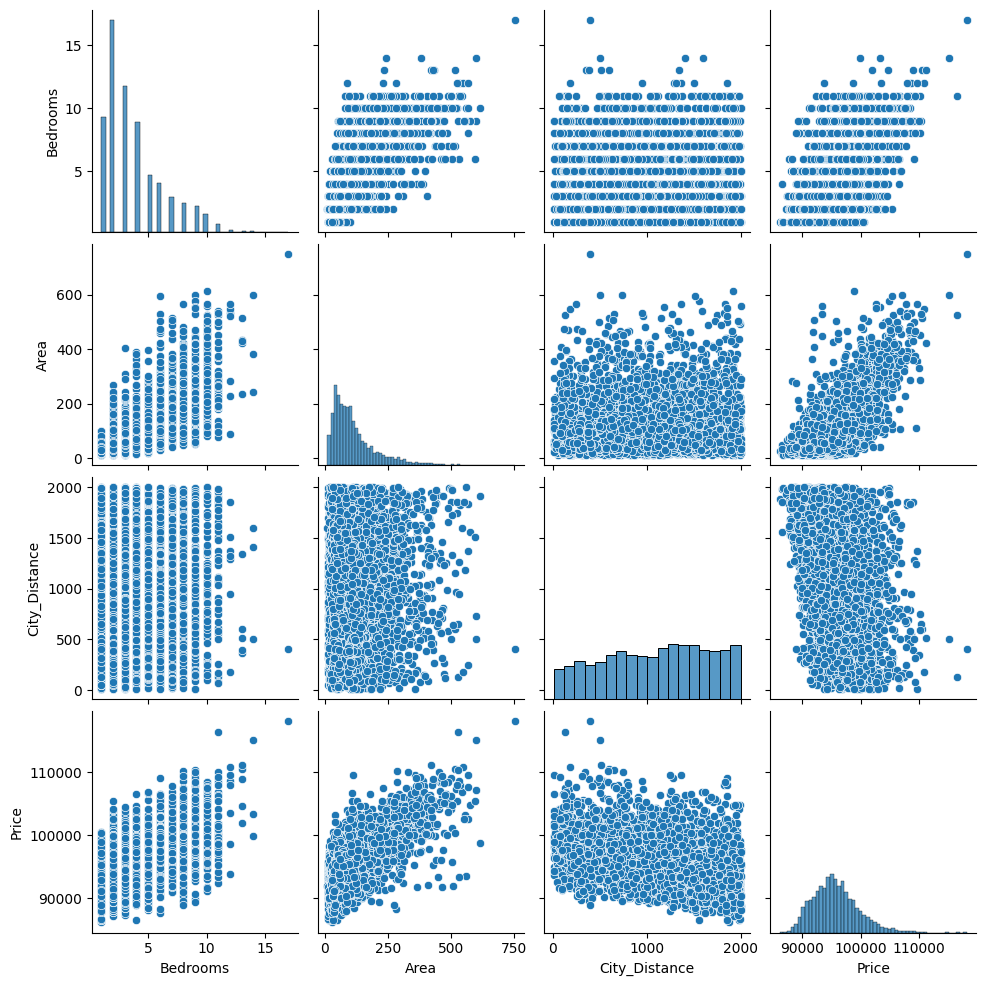

In [3]:
import seaborn as sns
sns.pairplot(df)

In [4]:
## w is weights vector (y-int, slope_Bedrooms, slope_area, ...)
## h is the model (hypothesis)
## h_w is the model using the w
## X is the model matrix
## y is the response vector

In [5]:
## create the model matrix for LINEAR REGRESSION
## we need to add a columns of 1s to estimate the y-intercept
n_samples = df.shape[0]
X = np.column_stack((np.ones(n_samples), df.Bedrooms, df.Area, df.City_Distance))
X

array([[1.00000000e+00, 1.00000000e+00, 2.61840979e+01, 1.28668000e+03],
       [1.00000000e+00, 1.00000000e+00, 3.48669009e+01, 1.85525000e+03],
       [1.00000000e+00, 1.00000000e+00, 3.69807090e+01, 6.92090000e+02],
       ...,
       [1.00000000e+00, 5.00000000e+00, 2.99563972e+02, 1.58537000e+03],
       [1.00000000e+00, 1.00000000e+00, 2.91939068e+01, 1.89623000e+03],
       [1.00000000e+00, 2.00000000e+00, 5.44375727e+01, 2.55240000e+02]])

In [6]:
np.set_printoptions(suppress=True, precision = 8)

In [7]:
X[:30, :]

array([[   1.        ,    1.        ,   26.18409786, 1286.68      ],
       [   1.        ,    1.        ,   34.86690091, 1855.25      ],
       [   1.        ,    1.        ,   36.98070899,  692.09      ],
       [   1.        ,    1.        ,   17.44572314, 1399.49      ],
       [   1.        ,    1.        ,   52.58764598,   84.65      ],
       [   1.        ,    1.        ,   22.42558366, 1901.1       ],
       [   1.        ,    1.        ,   33.03390008, 1833.94      ],
       [   1.        ,    1.        ,   27.8834803 , 1384.89      ],
       [   1.        ,    1.        ,   69.76510032,  640.89      ],
       [   1.        ,    1.        ,   37.79624701, 1754.86      ],
       [   1.        ,    1.        ,   25.97224889,  980.75      ],
       [   1.        ,    1.        ,   15.82402937,  220.44      ],
       [   1.        ,    1.        ,   55.78965932,  398.23      ],
       [   1.        ,    1.        ,   18.11714673,  948.58      ],
       [   1.        ,    1.      

In [8]:
## y vector
y = df.Price

In [9]:
## Linear Regression
## yhat = Xw (b0x0 + b1x1 + b2x2 + ....)
w = [0, 10000, 10, -8]
hw = X.dot(w) ## predictions are hw

In [10]:
hw

array([  -31.59902136, -4493.33099089,  4833.0870899 , ...,
       40312.67972187, -4877.90093242, 18502.45572702])

In [11]:
## loss function
## error
e = y - hw
e

,Price
0,96036.403578
1,96967.053561
2,93279.432850
3,93139.789643
4,89127.976716
...,...
4303,21353.370892
4304,48312.423481
4305,53491.035895
4306,97792.630058


In [12]:
## loss function
## squared error
e2 = (y - hw)**2
e2

,Price
0,9.222991e+09
1,9.402609e+09
2,8.701053e+09
3,8.675020e+09
4,7.943796e+09
...,...
4303,4.559664e+08
4304,2.334090e+09
4305,2.861291e+09
4306,9.563398e+09


In [15]:
## cost function (sum or average over the whole data set)
## 1 number summary
## J(w)
## Suppose the cost is mean squared error (MSE)
Jw = np.mean((y-hw)**2)
Jw

4905229394.307868

In [ ]:
## cost or loss = "mean squared error"
## MSE is also shown in matrix notation
## SSE = ||y - hw||_2^2
## MSE = 1/n*||y - hw||_2

In [16]:
## Derivative of J(w)
## gradient
## Because J(w) is convex in LR (=
## There is just one single point where J(w) = [0,0,0,0]
w

[0, 10000, 10, -8]

In [17]:
## Gradient is given by:
## D_jw = 2*X.T.dot(hw - y)
D_jw = 2*X.T.dot(hw - y)
D_jw ## this gradient is negative on most dimensions

array([-5.67862559e+08, -1.62070647e+09, -5.35755741e+10, -6.34439909e+11])

In [18]:
## to set the gradient to zero
## 2*X.T.dot(hw - y) = 0 and solve for w
## w = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
w = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
w

array([95373.99401939,   129.48354224,    25.32051844,    -2.90478157])

In [20]:
D_jw = 2*X.T.dot(X.dot(w) - y)
D_jw ## this gradient is negative on most dimensions

array([0.00000012, 0.00000609, 0.00014058, 0.00091666])

## **Neural Net using Tensorflow**

In [21]:
## prepare the data
X = df.drop('Price', axis=1)
y = df.Price

## Split the data (b/c we want to see the learning process in a training set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=630)

## NN models might get stuck more easily when the data is NOT scaled
from sklearn.preprocessing import StandardScaler
## instance
scaler = StandardScaler()
## fit on the training
scaler.fit(X_train)

## transform both training and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
## Build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential(
    [Dense(64, activation = "relu", input_shape = (X_train.shape[1], )),
     Dense(1)]  ## 1 neuron for output layer
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
## compile the model
## optimizer (stochastic gradient descent)
## loss function
## metric (R2)
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])

In [27]:
## Training a model
## Learning the right estimates
## Once you finish training (you got an optimal Gradient)
## THis is called a pre-trained model
model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9178636288.0000 - mae: 95721.6172
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9186147328.0000 - mae: 95763.0078
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9156876288.0000 - mae: 95614.3594
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9162948608.0000 - mae: 95648.0156
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9167499264.0000 - mae: 95670.6719
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9172924416.0000 - mae: 95695.3281
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9153626112.0000 - mae: 95594.5547
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9163281408.0000 - mae: 95641.8438
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9146209280.0000 - mae: 95561.1641
Epoch 10/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9129975808.0000 - mae: 95469.7422
Epoch 11/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [28]:
## model is pre-trained
## e,g. Chat GPT, LLama,
## I can keep on training them
model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7207141376.0000 - mae: 84790.6719
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7144444416.0000 - mae: 84422.9453
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7126103040.0000 - mae: 84307.3281
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7133749248.0000 - mae: 84351.6562
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7057875456.0000 - mae: 83900.8828
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7041246208.0000 - mae: 83797.3828
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7005147648.0000 - mae: 83581.9453
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6974395904.0000 - mae: 83399.8984
Epoch 9/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6931788288.0000 - mae: 83135.6562
Epoch 10/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 6892446208.0000 - mae: 82901.6406
Epoch 11/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/

In [ ]:
## Transfer learning
## Using pre-trained models
## Important areas of Machine Learning
## Loss, optimizers,